In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('./df_pitcher.csv')
df

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,...,2B,3B,SAC,SF,IBB,WP,BK,연도,연봉,WAR
0,2,양현,키움,1.99,29,1,0,0,1,1.000,...,5,1,1,1,0,0,0,2020,9000.0,0.72
1,3,오주원,키움,2.32,57,3,3,18,3,0.500,...,7,0,3,3,0,1,0,2020,20000.0,-0.12
2,4,김성민,키움,2.56,50,2,0,0,5,1.000,...,13,1,1,0,0,4,0,2020,9700.0,-0.21
3,5,조상우,키움,2.66,48,2,4,20,8,0.333,...,3,0,2,2,0,1,0,2020,20000.0,2.29
4,6,윤영삼,키움,2.87,54,3,3,1,3,0.500,...,12,2,3,3,1,3,0,2020,9800.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,14,오원석,SSG,5.23,28,8,10,0,0,0.444,...,22,2,5,7,0,11,0,2024,14000.0,2.95
733,15,문승원,SSG,5.23,50,5,8,1,9,0.385,...,27,1,4,2,1,3,0,2024,18000.0,1.09
734,16,이로운,SSG,5.62,50,6,1,0,5,0.857,...,13,1,3,3,2,3,0,2024,7400.0,0.49
735,17,송영진,SSG,5.70,17,3,3,0,0,0.500,...,9,1,4,4,0,8,2,2024,4500.0,0.81


In [3]:
df = df.drop('연도', axis = 1)
df

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,...,AVG,2B,3B,SAC,SF,IBB,WP,BK,연봉,WAR
0,2,양현,키움,1.99,29,1,0,0,1,1.000,...,0.214,5,1,1,1,0,0,0,9000.0,0.72
1,3,오주원,키움,2.32,57,3,3,18,3,0.500,...,0.261,7,0,3,3,0,1,0,20000.0,-0.12
2,4,김성민,키움,2.56,50,2,0,0,5,1.000,...,0.245,13,1,1,0,0,4,0,9700.0,-0.21
3,5,조상우,키움,2.66,48,2,4,20,8,0.333,...,0.253,3,0,2,2,0,1,0,20000.0,2.29
4,6,윤영삼,키움,2.87,54,3,3,1,3,0.500,...,0.258,12,2,3,3,1,3,0,9800.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,14,오원석,SSG,5.23,28,8,10,0,0,0.444,...,0.283,22,2,5,7,0,11,0,14000.0,2.95
733,15,문승원,SSG,5.23,50,5,8,1,9,0.385,...,0.319,27,1,4,2,1,3,0,18000.0,1.09
734,16,이로운,SSG,5.62,50,6,1,0,5,0.857,...,0.289,13,1,3,3,2,3,0,7400.0,0.49
735,17,송영진,SSG,5.70,17,3,3,0,0,0.500,...,0.257,9,1,4,4,0,8,2,4500.0,0.81


In [4]:
df.columns

Index(['순위', '선수명', '팀명', 'ERA', 'G', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H',
       'HR', 'BB', 'HBP', 'SO', 'R', 'ER', 'WHIP', 'CG', 'SHO', 'QS', 'BSV',
       'TBF', 'NP', 'AVG', '2B', '3B', 'SAC', 'SF', 'IBB', 'WP', 'BK', '연봉',
       'WAR'],
      dtype='object')

In [18]:
df_c = df.copy()

In [31]:
df_c = df_c.query('IP >= 32')

In [32]:
df_c

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,...,AVG,2B,3B,SAC,SF,IBB,WP,BK,연봉,WAR
0,2,양현,키움,1.99,29,1,0,0,1,1.000,...,0.214,5,1,1,1,0,0,0,9000.0,0.72
1,3,오주원,키움,2.32,57,3,3,18,3,0.500,...,0.261,7,0,3,3,0,1,0,20000.0,-0.12
2,4,김성민,키움,2.56,50,2,0,0,5,1.000,...,0.245,13,1,1,0,0,4,0,9700.0,-0.21
3,5,조상우,키움,2.66,48,2,4,20,8,0.333,...,0.253,3,0,2,2,0,1,0,20000.0,2.29
5,7,브리검,키움,2.96,28,13,5,0,0,0.722,...,0.245,32,2,4,4,0,7,1,80000.0,3.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,14,오원석,SSG,5.23,28,8,10,0,0,0.444,...,0.283,22,2,5,7,0,11,0,14000.0,2.95
733,15,문승원,SSG,5.23,50,5,8,1,9,0.385,...,0.319,27,1,4,2,1,3,0,18000.0,1.09
734,16,이로운,SSG,5.62,50,6,1,0,5,0.857,...,0.289,13,1,3,3,2,3,0,7400.0,0.49
735,17,송영진,SSG,5.70,17,3,3,0,0,0.500,...,0.257,9,1,4,4,0,8,2,4500.0,0.81


In [23]:
df.columns

Index(['순위', '선수명', '팀명', 'ERA', 'G', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H',
       'HR', 'BB', 'HBP', 'SO', 'R', 'ER', 'WHIP', 'CG', 'SHO', 'QS', 'BSV',
       'TBF', 'NP', 'AVG', '2B', '3B', 'SAC', 'SF', 'IBB', 'WP', 'BK', '연봉',
       'WAR'],
      dtype='object')

In [30]:
df.describe()

,순위,ERA,G,W,L,SV,HLD,WPCT,IP,H,...,AVG,2B,3B,SAC,SF,IBB,WP,BK,연봉,WAR
count,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,...,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000
mean,12.423338,4.556024,34.392130,3.738128,3.603799,1.990502,4.226594,0.473189,64.229715,22.309769,...,0.262985,10.987788,0.991859,2.862958,2.340570,0.972863,2.886024,0.206242,20391.044776,0.915183
std,6.432332,3.312737,18.618878,3.710015,3.027570,6.294940,6.563978,0.290346,46.353758,39.043442,...,0.045206,8.329564,1.181809,2.339744,2.017423,1.307097,2.802955,0.506280,28146.669302,1.487082
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.300000,...,0.059000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2700.000000,-0.740000
25%,7.000000,3.320000,21.000000,1.000000,1.000000,0.000000,0.000000,0.300000,32.000000,0.300000,...,0.238000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,5800.000000,-0.010000
50%,12.000000,4.200000,30.000000,3.000000,3.000000,0.000000,1.000000,0.500000,52.000000,0.600000,...,0.261000,9.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,10400.000000,0.280000
75%,18.000000,5.270000,50.000000,5.000000,5.000000,0.000000,6.000000,0.667000,79.000000,35.000000,...,0.288000,14.000000,2.000000,4.000000,4.000000,1.000000,4.000000,0.000000,20000.000000,1.380000
max,25.000000,81.000000,80.000000,19.000000,14.000000,44.000000,40.000000,1.000000,207.000000,183.000000,...,0.750000,40.000000,6.000000,12.000000,11.000000,8.000000,18.000000,4.000000,230000.000000,8.450000


In [33]:
df_1 = df_c[['ERA', 'W', 'IP', 'WHIP', 'WPCT','QS', 'WAR', 'NP','연봉']]
df_1['W/QS'] = df_1['W'] / df_1['QS']
df_1['WAR*0.1'] = df_1['WAR'] * 0.1
df_1_corr = df_1.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_3328\60066435.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['W/QS'] = df_1['W'] / df_1['QS']
C:\Users\user\AppData\Local\Temp\ipykernel_3328\60066435.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['WAR*0.1'] = df_1['WAR'] * 0.1


c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  fig.canvas.draw()


<Axes: >

c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


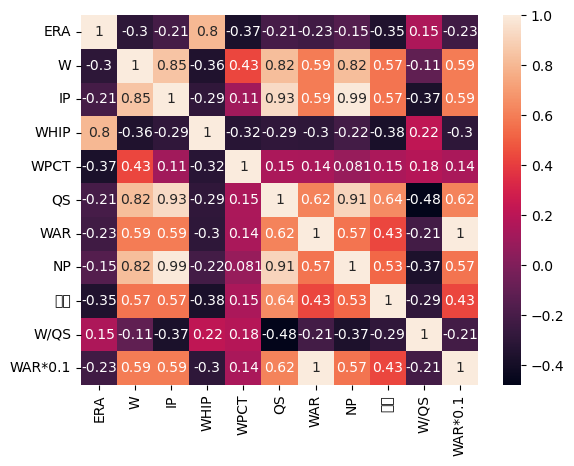

In [34]:
sns.heatmap(df_1_corr, annot = True)